# 1st test - linear layers


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ]))


test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=200, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=200, shuffle=False)

In [3]:
class MNISTModel(nn.Module):

    def __init__(self):
        super(MNISTModel, self).__init__()
        
        self.fc1 = nn.Linear(784, 128) 
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)


    def forward(self, x):
        h1 = torch.sigmoid(self.fc1(x))
        h2 = torch.sigmoid(self.fc2(h1))
        # function discovered in https://www.youtube.com/watch?v=ixathu7U-LQ
        # 1 line
        output = F.log_softmax(self.fc3(h2), dim=1)

        return output

In [4]:
model = MNISTModel()
model

MNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5
model.train()
iter_count = 0
accuracy_arr = [] 
loss_arr = []
iteration_arr = [] 
for epoch in range(epochs):
    for i,data in enumerate(trainset):
        X,y = data
        X = X.view(-1,28*28)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        
        loss_arr.append(loss.data)
        iteration_arr.append(iter_count)
        iter_count+=1
    print(loss)

tensor(0.3005, grad_fn=<NllLossBackward>)
tensor(0.2102, grad_fn=<NllLossBackward>)
tensor(0.2117, grad_fn=<NllLossBackward>)
tensor(0.2539, grad_fn=<NllLossBackward>)
tensor(0.1865, grad_fn=<NllLossBackward>)


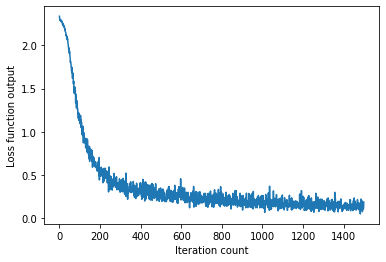

In [8]:
import matplotlib.pyplot as plt
plt.plot(iteration_arr,loss_arr)
plt.xlabel("Iteration count")
plt.ylabel("Loss function output")
plt.show()

In [17]:
"""#testing
def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm  """
import numpy as np
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for i,data in enumerate(testset):
        X,y = data
        batch_pred = model(X.view(-1, 784))
        for j, pred in enumerate(batch_pred):
            if torch.argmax(pred) == y[j]:       
                correct+=1
            total+=1            
print("Accuracy: {}".format(correct/total))

Accuracy: 0.9555


# Exploratory Data Analysis

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,)) 
                       ]))


test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [373]:
train


Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [3]:
train.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [404]:
t = next(iter(trainset))

t[0].shape

#x examples of 28x28 pixels in grayscale 

torch.Size([32, 1, 28, 28])

In [339]:
t[0].shape

torch.Size([1, 1, 28, 28])

5


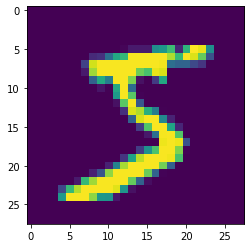

In [340]:
import matplotlib.pyplot as plt

image, label = next(iter(train))
plt.imshow(image.squeeze())
print(label)